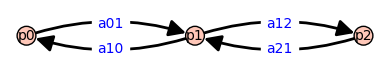

In [1]:
var('p0 p1 p2 a01 a10 a12 a21')
G=graphs.PathGraph(3).to_directed()
G.relabel({0:p0,1:p1,2:p2})
G.set_edge_label(p0,p1,a01)
G.set_edge_label(p1,p0,a10)
G.set_edge_label(p1,p2,a12)
G.set_edge_label(p2,p1,a21)
G.show(figsize=4,edge_labels=True)

In [2]:
A = G.weighted_adjacency_matrix()

In [3]:
L = diagonal_matrix(sum(A.T))-A
show(L)

[      a01      -a01         0]
[     -a10 a10 + a12      -a12]
[        0      -a21       a21]

In [4]:
sum(A.T) == sum(A.columns())

True

In [5]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

In [6]:
Q = generator(A)
show(Q)

[      -a01        a01          0]
[       a10 -a10 - a12        a12]
[         0        a21       -a21]

In [7]:
sum(Q.columns()) == sum(Q.T)

True

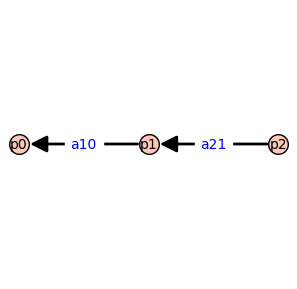

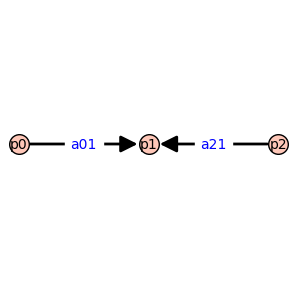

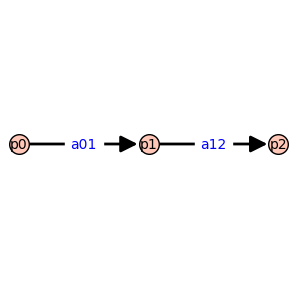

In [8]:
T0 = G.copy()
T1 = G.copy()
T2 = G.copy()

T0.delete_edge(p0,p1)
T0.delete_edge(p1,p2)

T1.delete_edge(p1,p0)
T1.delete_edge(p1,p2)

T2.delete_edge(p1,p0)
T2.delete_edge(p2,p1)

T0.show(figsize=4,edge_labels=True)
T1.show(figsize=4,edge_labels=True)
T2.show(figsize=4,edge_labels=True)

In [9]:
z0 = Q[[1,2],[1,2]].determinant().simplify_full()
z1 = Q[[0,2],[0,2]].determinant().simplify_full()
z2 = Q[[0,1],[0,1]].determinant().simplify_full()
print(f'[ z0 : z1 : z2 ] = [ {z0} : {z1} : {z2} ]')

[ z0 : z1 : z2 ] = [ a10*a21 : a01*a21 : a01*a12 ]


In [10]:
zT = z0+z1+z2
p0 = z0/zT
p1 = z1/zT
p2 = z2/zT
show(table([[f'{p0=}'],[f'{p1=}'],[f'{p2=}']]))

p0=a10*a21/(a01*a12 + a01*a21 + a10*a21)
p1=a01*a21/(a01*a12 + a01*a21 + a10*a21)
p2=a01*a12/(a01*a12 + a01*a21 + a10*a21)
